In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_excel('Data_Train.xlsx')
pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.dropna(inplace=True)
train_data.shape

(10682, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
train_data['Journey_Day']=pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
train_data['Journey_Month']=pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [8]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute


In [10]:
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
duration=list(train_data['Duration'])
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip()+' 0m'
    else:
      duration[i]='0h '+duration[i]

  duration_hours.append(int(duration[i].split(sep='h')[0]))
  duration_mins.append(int(duration[i].split()[1].split(sep='m')[0]))

train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins

In [13]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [14]:
train_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], inplace=True)
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


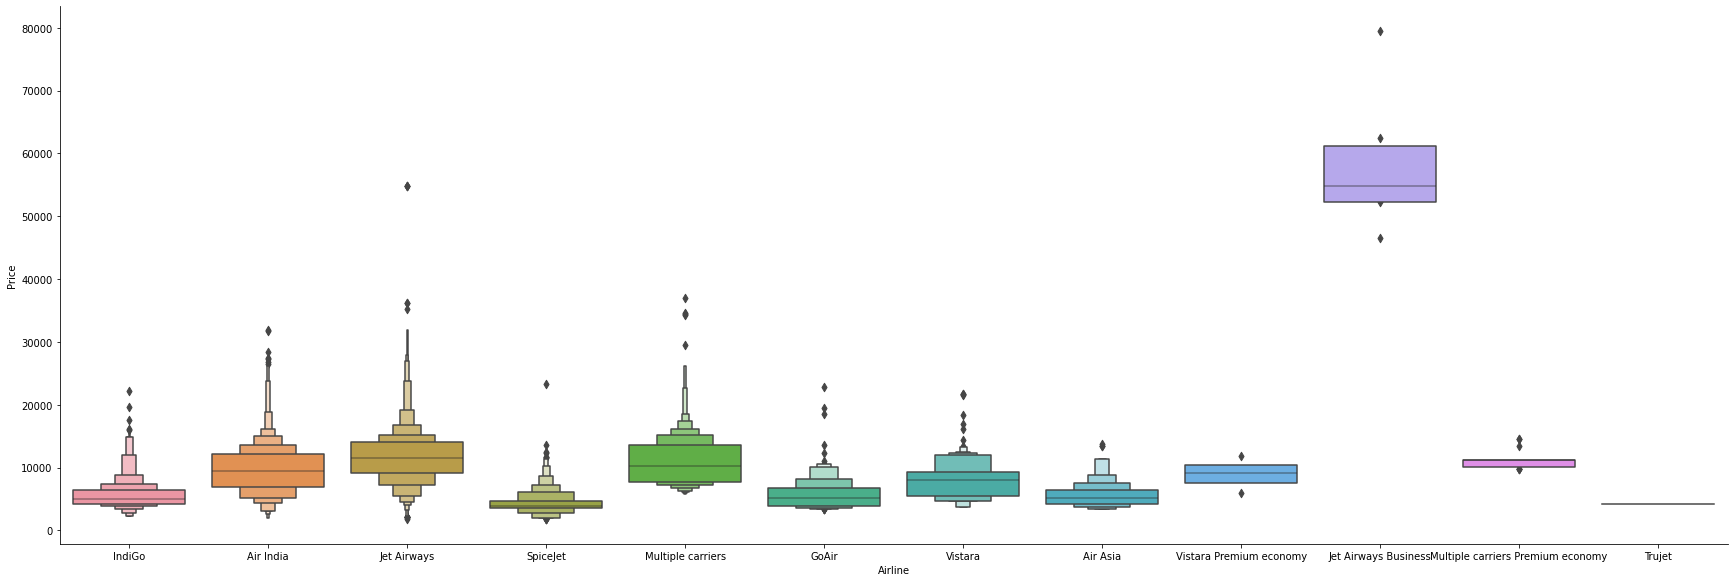

In [15]:
sns.catplot(y='Price', x='Airline', kind='boxen', data=train_data, height=8, aspect=3)

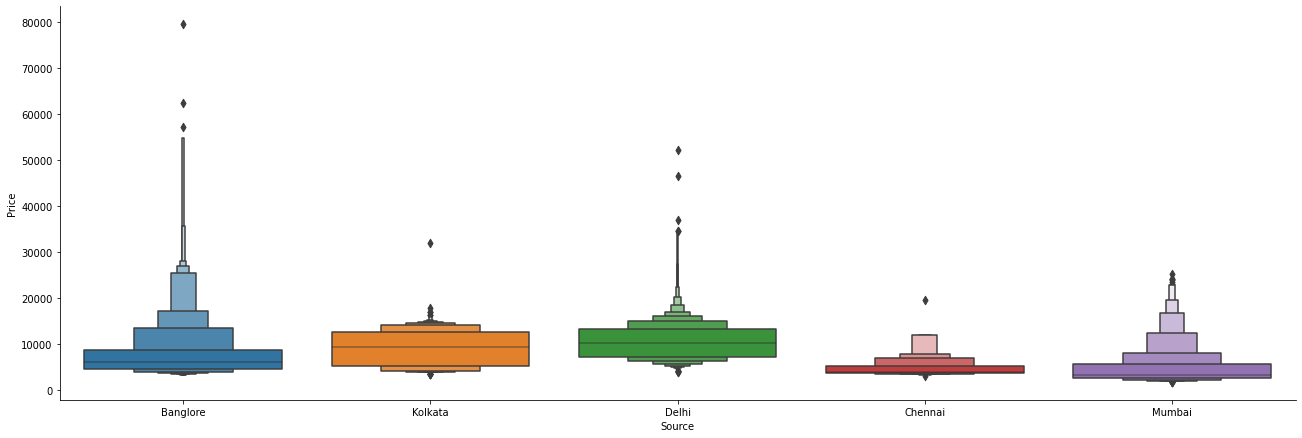

In [16]:
sns.catplot(x='Source', y='Price', data=train_data, kind='boxen', height=6, aspect=3)

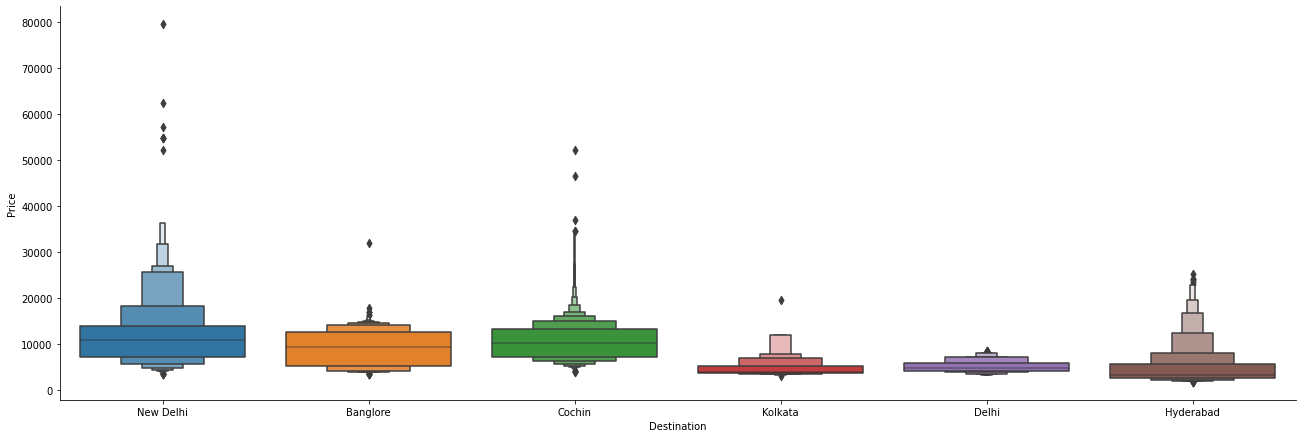

In [17]:
sns.catplot(x='Destination', y='Price', data=train_data, kind='boxen', height=6, aspect=3)

In [18]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

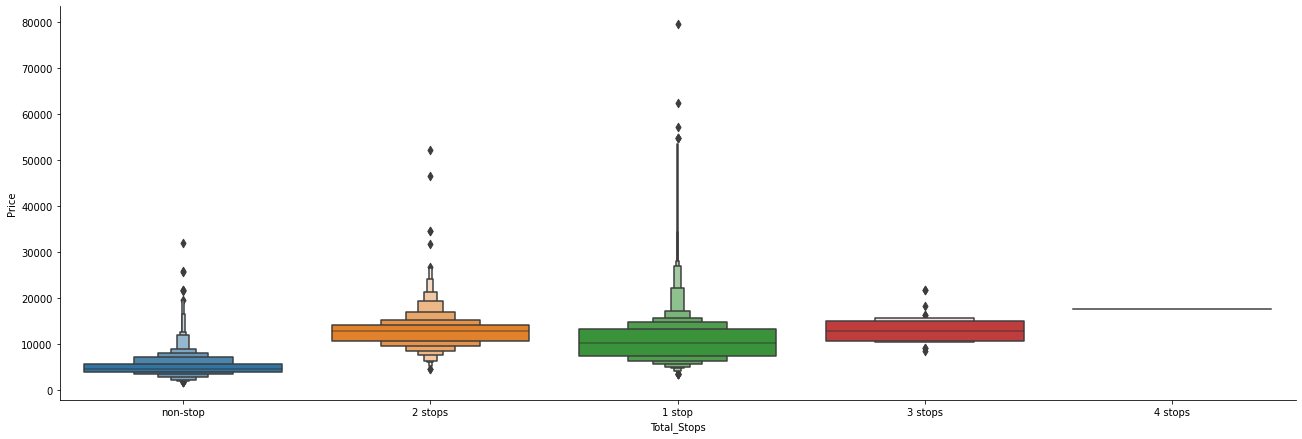

In [19]:
sns.catplot(x='Total_Stops', y='Price', data=train_data, kind='boxen', height=6, aspect=3)

In [20]:
Airline= pd.get_dummies(train_data['Airline'])
Source= pd.get_dummies(train_data['Source'],prefix='Source')
Destination= pd.get_dummies(train_data['Destination'], prefix='Destination')

In [21]:
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [23]:
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [24]:
train_data['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)
train_data= pd.concat([train_data, Airline, Source, Destination], axis=1)

In [25]:
train_data.drop(columns=['Airline', 'Source', 'Destination'],inplace=True)

In [26]:
train_data.head()

,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [27]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXB → DEL → BLR       1
BOM → COK → MAA → HYD       1
CCU → IXZ → MAA → BLR       1
BOM → BBI → HYD             1
BOM → NDC → HYD             1
Name: Route, Length: 128, dtype: int64

In [28]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [29]:
train_data.drop(columns=['Route', 'Additional_Info'],inplace=True)

In [30]:
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [31]:
train_data.shape

(10682, 33)

In [32]:
df= pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Test Data Handling

In [33]:
test_data= pd.read_excel('Test_set.xlsx')
pd.set_option('display.max_columns',None)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [34]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [35]:
test_data.shape

(2671, 10)

In [36]:
test_data['Journey_Day']=pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data['Journey_Month']=pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [37]:
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [38]:
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [39]:
duration=list(test_data['Duration'])
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip()+' 0m'
    else:
      duration[i]='0h '+duration[i]

  duration_hours.append(int(duration[i].split(sep='h')[0]))
  duration_mins.append(int(duration[i].split()[1].split(sep='m')[0]))

test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins

In [40]:
test_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], inplace=True)
test_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15,15


In [41]:
Airline= pd.get_dummies(test_data['Airline'])
Source= pd.get_dummies(test_data['Source'],prefix='Source')
Destination= pd.get_dummies(test_data['Destination'], prefix='Destination')

In [42]:
test_data['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)
test_data= pd.concat([test_data, Airline, Source, Destination], axis=1)

In [43]:
test_data.drop(columns=['Airline', 'Source', 'Destination'],inplace=True)

In [44]:
test_data.drop(columns=['Route', 'Additional_Info'],inplace=True)

In [45]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [46]:
test_data.shape

(2671, 31)

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_Day                        2671 non-null   int64
 2   Journey_Month                      2671 non-null   int64
 3   Dep_hour                           2671 non-null   int64
 4   Dep_min                            2671 non-null   int64
 5   Arrival_hour                       2671 non-null   int64
 6   Arrival_min                        2671 non-null   int64
 7   Duration_hours                     2671 non-null   int64
 8   Duration_mins                      2671 non-null   int64
 9   Air Asia                           2671 non-null   uint8
 10  Air India                          2671 non-null   uint8
 11  GoAir                              2671 non-null   uint8
 12  IndiGo              

In [48]:
train_data.drop(columns=['Trujet'],inplace=True)

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_Day                        10682 non-null  int64
 3   Journey_Month                      10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dep_min                            10682 non-null  int64
 6   Arrival_hour                       10682 non-null  int64
 7   Arrival_min                        10682 non-null  int64
 8   Duration_hours                     10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Air Asia                           10682 non-null  uint8
 11  Air India                          10682 non-null  uint8
 12  GoAir             

In [50]:
Y=train_data.iloc[:,1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [51]:
X=train_data.drop(columns=['Price'])
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### Feature Extraction

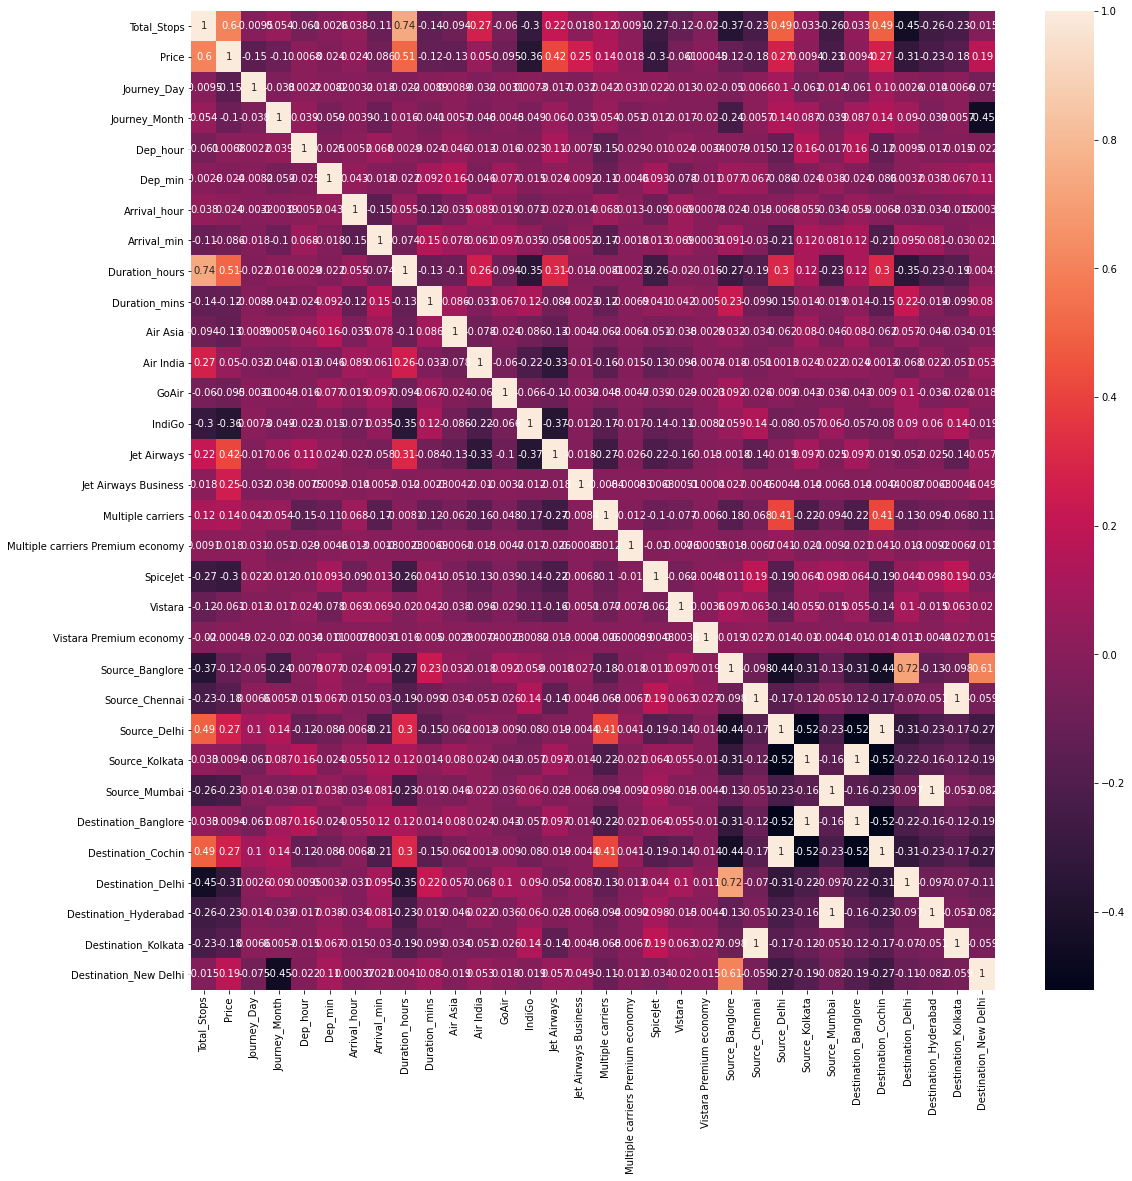

In [52]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True)

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selection= ExtraTreesRegressor()
feature_selection.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [54]:
print(feature_selection.feature_importances_)

[2.09914951e-01 1.44712080e-01 5.36726043e-02 2.45390468e-02
 2.06062790e-02 2.73151159e-02 1.92153904e-02 1.32934996e-01
 1.73771180e-02 2.17405756e-03 8.68273303e-03 1.72750660e-03
 1.69504606e-02 1.45443539e-01 6.76003729e-02 1.85527278e-02
 8.22179453e-04 2.50198864e-03 4.80489562e-03 8.73156913e-05
 8.10161540e-03 4.37591858e-04 1.00630070e-02 1.86759685e-03
 7.08950663e-03 2.02551890e-03 8.48954586e-03 1.74915459e-02
 6.67757777e-03 4.89868882e-04 1.76312657e-02]


In [55]:
X.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

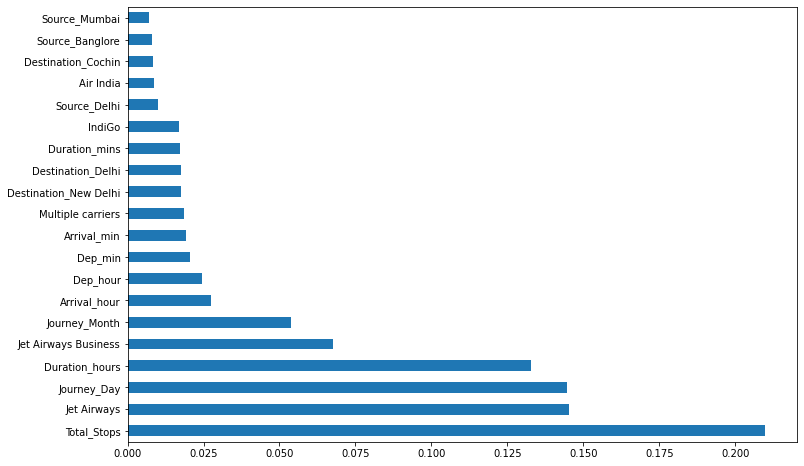

In [56]:
plt.figure(figsize=(12,8))
feature_importance=pd.Series(feature_selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

We can see that the timings and days of the journey are major factors for determining flight fare.

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_Day                        2671 non-null   int64
 2   Journey_Month                      2671 non-null   int64
 3   Dep_hour                           2671 non-null   int64
 4   Dep_min                            2671 non-null   int64
 5   Arrival_hour                       2671 non-null   int64
 6   Arrival_min                        2671 non-null   int64
 7   Duration_hours                     2671 non-null   int64
 8   Duration_mins                      2671 non-null   int64
 9   Air Asia                           2671 non-null   uint8
 10  Air India                          2671 non-null   uint8
 11  GoAir                              2671 non-null   uint8
 12  IndiGo              

In [58]:
print('Shape of X: ', X.shape)
print('Shape of Y: ',Y.shape)

Shape of X:  (10682, 31)
Shape of Y:  (10682,)


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=69)

In [60]:
X_train.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
5771,1,18,3,8,0,13,15,5,15,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
965,0,15,4,6,55,9,30,2,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4545,0,18,4,20,55,23,40,2,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2843,0,21,5,15,30,18,5,2,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
15,2,3,3,16,40,19,15,26,35,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [61]:
Y_train.head()

5771    12284
965      3841
4545     5048
2843     4804
15      14011
Name: Price, dtype: int64

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
Y_pred= lr.predict(X_test)
lr.score(X_test,Y_test)

0.200280767430978

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
Y_pred= dt.predict(X_test)
dt.score(X_test,Y_test)

0.7224877509742229

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
Y_pred= rf.predict(X_test)
rf.score(X_test, Y_test)

0.818131012852168

In [68]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE:  1860.2592595463273


In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
n_estimators=[int(x) for x in range(100,1200,100)]
max_features= ['auto', 'sqrt']
max_depth= [int(x) for x in range(5,30,5)]
min_samples_split= [2,5,10, 15,100]
min_samples_leaf= [1,2,5,10]

In [71]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [72]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                             scoring='neg_mean_squared_error', n_iter=10,cv=5, 
                             verbose=2, random_state=69, n_jobs=1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   6.5s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=1100, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [74]:
Y_pred=rf_random.predict(X_test)

In [75]:
Y_pred.shape

(2137,)

In [76]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.8301802559793013

In [77]:
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE:  1797.58005946041


In [80]:
import pickle
import bz2
file =bz2.BZ2File('flight.pkl','w')
pickle.dump(rf,file)